In [1]:
import numpy as np
import pylab as pl
import random
import re


import os
import shutil
print(os.getcwd())

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import ImageGrid

from IPython.display import display, HTML

/home/ashwin/GIT/FrontEnd_cosmo


In [2]:
location_home = os.getcwd()
location_Save = "Save"

location_Save = os.path.join(location_home,location_Save)

In [3]:
backup_list=os.listdir(location_Save)
print(backup_list)



['BackupRun_3', 'BackupRun_1', 'BackupRun_5', 'BackupRun_2', 'BackupRun_4', 'animation', 'BackupRun']


In [4]:
intrestFolder = 'BackupRun_3'
location_backup=os.path.join(location_Save,intrestFolder)
print(location_backup)

/home/ashwin/GIT/FrontEnd_cosmo/Save/BackupRun_3


In [5]:
files = os.listdir(location_backup)
print(files)

['halo_catalogue_20.000', 'HI_map_15.000', 'pk.ionzs0.999_15.000', 'output.nbody_20.000', 'pk.ionz0.930_10.000', 'HI_maprs_20.000', 'HI_maprs_5.000', 'pk.ionz1.000_25.000', 'halo_catalogue_10.000', 'pk.ionz1.000_30.000', 'output.nbody_10.000', 'pk.ionzs0.000_1.000', 'output.nbody_15.000', 'pk.ionzs1.000_30.000', 'input.nbody_comp', 'HI_maprs_1.000', 'HI_maprs_15.000', 'output.nbody_30.000', 'pk.ionzs0.930_10.000', 'output.nbody_1.000', 'halo_catalogue_15.000', 'output.nbody_25.000', 'halo_catalogue_30.000', 'halo_catalogue_5.000', 'halo_catalogue_1.000', 'pk.ionzs1.000_20.000', 'pk.ionz0.999_15.000', 'HI_map_30.000', 'output.nbody_5.000', 'pk.ionzs0.000_5.000', 'HI_map_25.000', 'HI_maprs_10.000', 'HI_map_20.000', 'pk.ionz1.000_20.000', 'HI_map_1.000', 'pk.ionz0.000_5.000', 'HI_map_10.000', 'HI_map_5.000', 'pk.ionzs1.000_25.000', 'pk.ionz0.000_1.000', 'HI_maprs_25.000', 'halo_catalogue_25.000', 'HI_maprs_30.000']


In [6]:
search = "HI_map_"
intrestFiles = []
for i in files:
    if search in i:
        intrestFiles.append(i)
        print(i)


intrestFiles = sorted(intrestFiles, key=lambda s: [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)])[::-1]
print(intrestFiles)

HI_map_15.000
HI_map_30.000
HI_map_25.000
HI_map_20.000
HI_map_1.000
HI_map_10.000
HI_map_5.000
['HI_map_30.000', 'HI_map_25.000', 'HI_map_20.000', 'HI_map_15.000', 'HI_map_10.000', 'HI_map_5.000', 'HI_map_1.000']


No of grids in the desnity file
64
64
64


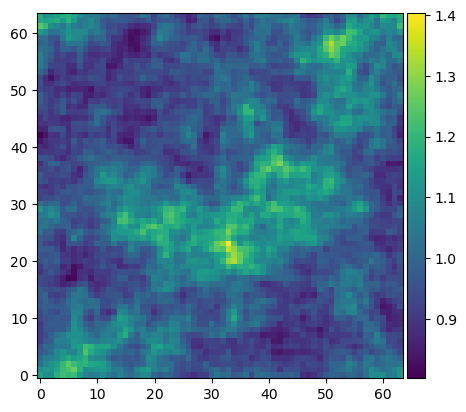

In [10]:
filename=intrestFiles[0]
f = open( os.path.join(location_backup,filename))
temp_mesh = np.fromfile(f,count=3,dtype='int32')
N1,N2,N3 = temp_mesh
data_num =1
print('No of grids in the desnity file')
print(N1)
print(N2)
print(N3)
datatype = dtype=(np.float32)
data = np.fromfile(f, dtype=datatype,count=N1*N2*N3*data_num)
f.close()

#data = np.loadtxt(filename)
#print(data.shape)
dT = data.reshape((N1,N2,N3,data_num), order='C') # Reshaping the data into N1xN2xN3 grid format
 
#print(dT[0,0,9,0])
Tpl=dT[:,:,:,0]  # extracting out the first 5 slices
#print(np.shape(Tpl))
av_Tpl=np.mean(Tpl, axis=0) # stacking (averaging) the 5 slices along x-axis(axis=0) 
#print(np.shape(av_Tpl))

fig = pl.figure(1, (5., 5.))
pl.imshow(av_Tpl,origin='lower')
pl.colorbar(pad=0.01,fraction=0.047)
#pl.clim(0,5)

pl.show()


In [11]:
av_Tpl

array([[1.1499193, 1.1024814, 1.101323 , ..., 1.0461558, 1.0581323,
        1.1168194],
       [1.1040552, 1.1222972, 1.1191084, ..., 1.0311284, 1.0685226,
        1.1085622],
       [1.0264288, 1.0835495, 1.1102916, ..., 1.0339047, 1.0294452,
        1.0381815],
       ...,
       [1.2491381, 1.2091221, 1.1021658, ..., 1.0802364, 1.0888404,
        1.2111379],
       [1.1671389, 1.1453086, 1.1552678, ..., 1.1101819, 1.0681862,
        1.1698511],
       [1.1798122, 1.104836 , 1.1155714, ..., 1.1698889, 1.1573693,
        1.1833051]], dtype=float32)

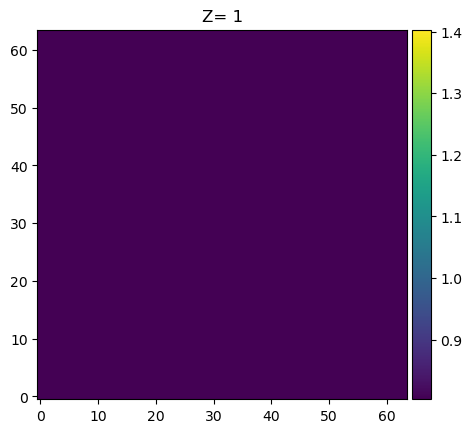

In [14]:



fig, ax = plt.subplots()
im = ax.imshow(av_Tpl, origin='lower', cmap='viridis')
cbar = fig.colorbar(im, pad=0.01, fraction=0.047)

def update(frame):
    filename = intrestFiles[frame]
    f = open(os.path.join(location_backup, filename), 'rb')
    temp_mesh = np.fromfile(f, count=3, dtype='int32')
    N1, N2, N3 = temp_mesh
    data = np.fromfile(f, dtype=datatype, count=N1*N2*N3*data_num)
    f.close()

    dT = data.reshape((N1, N2, N3, data_num), order='C')
    Tpl = dT[:, :, :, 0]
    av_Tpl = np.mean(Tpl, axis=0)


  #  pl.imshow(av_Tpl,origin='lower')
    im.set_array(av_Tpl)

    z=re.search(r'([0-9]+)', filename).group()
    ax.set_title(f'Z= {z}')
    return im,

animation = FuncAnimation(fig, update, frames=len(intrestFiles), interval=1000, blit=True)
HTML(animation.to_html5_video())

In [ ]:
animation.save(f'Save/animation/mov_{intrestFolder}_{search}.mp4', writer='ffmpeg', fps=1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))

X = xx
Y = yy
Z = 10 * np.ones(X.shape)

data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)
fig = plt.figure()

ax2 = fig.add_subplot(122, projection='3d')
ax2.contourf(X, Y, Tpl, 100, zdir='z', offset=0.5, cmap="plasma")

plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [32]:
filename=intrestFiles[0]
f = open( os.path.join(location_backup,filename))
temp_mesh = np.fromfile(f,count=3,dtype='int32')
N1,N2,N3 = temp_mesh
data_num =1
print('No of grids in the desnity file')
print(N1)
print(N2)
print(N3)
datatype = dtype=(np.float32)
data = np.fromfile(f, dtype=datatype,count=N1*N2*N3*data_num)
f.close()

No of grids in the desnity file
64
64
64


In [34]:
data

array([0.88290834, 1.1625572 , 1.214692  , ..., 0.9328891 , 0.86489683,
       1.598382  ], dtype=float32)

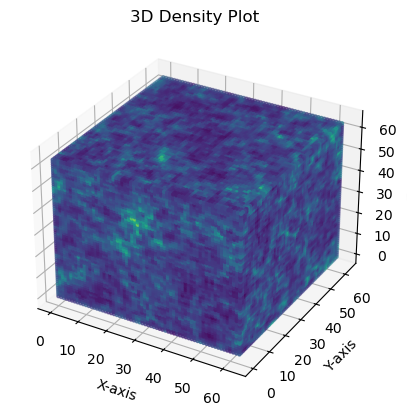

In [35]:

# Load data from the file

x, y, z = np.meshgrid(np.arange(N1), np.arange(N2), np.arange(N3))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the density values
ax.scatter(x, y, z, c=data.flatten(), cmap='viridis', marker='.')

# Customize the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Density Plot')

# Show the plot
plt.show()


In [ ]:
import os
import numpy as np
import plotly.graph_objs as go

# Load data from the file
filename = intrestFiles[0]  # Assuming intrestFiles is a list of filenames
f = open(os.path.join(location_backup, filename))
temp_mesh = np.fromfile(f, count=3, dtype='int32')
N1, N2, N3 = temp_mesh
data_num = 1
print('No of grids in the density file')
print(N1)
print(N2)
print(N3)
datatype = np.float32
data = np.fromfile(f, dtype=datatype, count=N1 * N2 * N3 * data_num)
f.close()

# Create 3D grid
x, y, z = np.meshgrid(np.arange(N1), np.arange(N2), np.arange(N3))

# Normalize the data
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Create a color scale for transparency
opacity_scale = [[value, value] for value in normalized_data.flatten()]

# Create a 3D scatter plot
scatter = go.Scatter3d(
    x=x.flatten(),
    y=y.flatten(),
    z=z.flatten(),
    mode='markers',
    marker=dict(
        size=4,
        color=normalized_data.flatten(),
        colorscale='Viridis',
        opacity=1,  # This opacity is for the entire plot
        colorbar=dict(title='Density')
    ),
    hoverinfo='none',  # Disable hover info for better performance
)

# Layout settings
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis'),
        zaxis=dict(title='Z-axis'),
    ),
    title='3D Density Plot',
)

# Create the figure
fig = go.Figure(data=[scatter], layout=layout)

# Show the interactive plot
fig.show()
